In [1]:
import numpy as np 
import pandas as pd 
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

### File train.csv

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
id          4000 non-null object
rle_mask    2438 non-null object
dtypes: object(2)
memory usage: 62.6+ KB


In [4]:
# Number of images without salt
4000-2438

1562

In [5]:
len(train.id.unique())

4000

**train.csv included the id for each image in train folder and rle_mask.**<br>
* rle_mask can be NaN (no salt) or list of number in type of string
* All file id in train are unique

### File depth.csv

In [6]:
depth = pd.read_csv('depths.csv')
depth.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


In [7]:
depth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
id    22000 non-null object
z     22000 non-null int64
dtypes: int64(1), object(1)
memory usage: 343.8+ KB


In [8]:
len(depth.id.unique())

22000

**depth.csv included id and z (depth) of all image files in train and test set. All id in depth are unique**

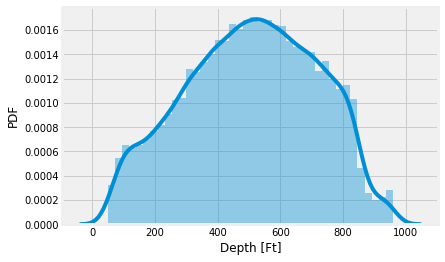

In [9]:
# distribution of depth
sns.distplot(depth.z)
plt.xlabel('Depth [Ft]')
plt.ylabel('PDF')
plt.show()

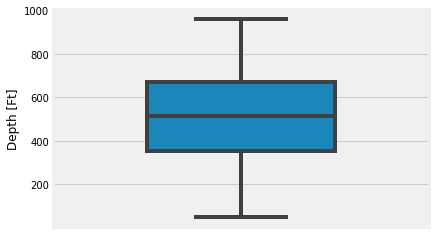

In [10]:
sns.boxplot(depth.z,orient='v',width=0.5)
plt.ylabel('Depth [Ft]')
plt.show()

In [11]:
depth.describe()

,z
count,22000.000000
mean,506.453318
std,208.605991
min,50.000000
25%,352.000000
50%,513.000000
75%,671.000000
max,959.000000


In [12]:
depth.z.skew()

-0.1281704058103165

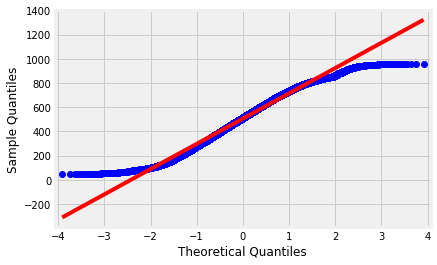

In [13]:
# Quantile-Quantile Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(depth.z, line='s')
pyplot.show()

In [14]:
# depth of train set
x1 = depth[depth['id'].isin(train['id'])]
x1.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


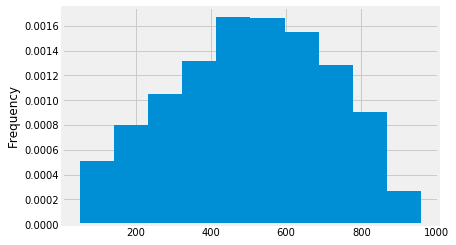

In [15]:
x1['z'].plot(kind='hist',density=True)

In [16]:
x1.describe()

,z
count,4000.000000
mean,506.706500
std,207.979243
min,51.000000
25%,351.000000
50%,514.000000
75%,669.000000
max,959.000000


In [17]:
x1.z.skew()

-0.11911136407895043

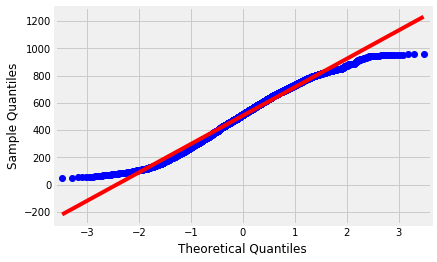

In [18]:
qqplot(x1.z, line='s')
plt.show()

In [19]:
# depth of test set
x2 = depth[depth['id'].isin(train['id'])==False]
x2.head()

,id,z
4000,353e010b7b,264
4001,5439dbbddf,557
4002,71bab9f311,846
4003,52551f7a80,610
4004,512d8d9997,577


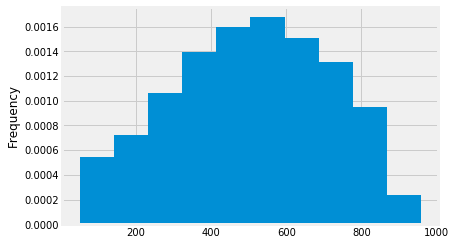

In [20]:
x2['z'].plot(kind='hist',density=True)

In [21]:
x2.describe()

,z
count,18000.000000
mean,506.397056
std,208.750735
min,50.000000
25%,353.000000
50%,513.000000
75%,671.000000
max,959.000000


In [22]:
x2.z.skew()

-0.1301641644208969

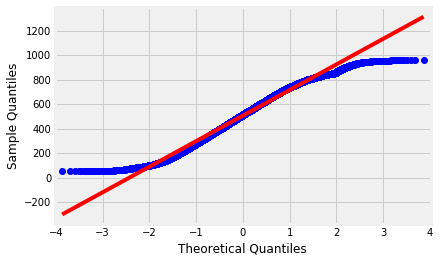

In [23]:
qqplot(x2.z, line='s')
pyplot.show()

### Compare depth distrubtion between train and test set

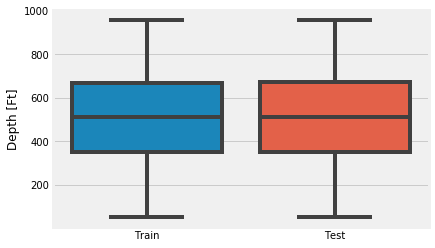

In [24]:
sns.boxplot(data=[x1['z'],x2['z']],orient='v')
plt.xticks([0,1], ['Train','Test'])
plt.ylabel('Depth [Ft]')
plt.show()

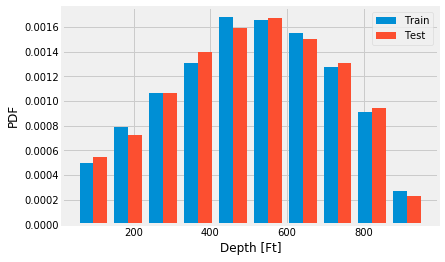

In [25]:
plt.hist(x=[x1['z'],x2['z']],density=True)
plt.xlabel('Depth [Ft]')
plt.ylabel('PDF')
plt.legend(['Train','Test'])
plt.show()

## Kolmogorov-Smirnov Test
(whether two samples have the same distribution)

In [26]:
from scipy.stats import ks_2samp

Null hypothesis that two samples have the same distribution.

In [27]:
# train vs test
ks_2samp(x1.z,x2.z)

Ks_2sampResult(statistic=0.011944444444444424, pvalue=0.7364148287076587)

In [28]:
# all data vs train
ks_2samp(depth.z,x1.z)

Ks_2sampResult(statistic=0.009772727272727266, pvalue=0.90163614708896)

In [29]:
# all data vs test
ks_2samp(depth.z,x2.z)

Ks_2sampResult(statistic=0.002171717171717158, pvalue=0.9999999999586154)

Can not reject null hypothesis.

## No salt image in train set

In [30]:
x1 = x1.set_index('id',drop=True)
x1.head()

,z
id,
4ac19fb269,306
1825fadf99,157
f59821d067,305
5b435fad9d,503
e340e7bfca,783


In [31]:
train_depth = train.set_index('id',drop=True)
train_depth.head()

,rle_mask
id,
575d24d81d,NaN
a266a2a9df,5051 5151
75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [32]:
train_depth = train_depth.join(x1)
train_depth.head()

,rle_mask,z
id,,
575d24d81d,NaN,843
a266a2a9df,5051 5151,794
75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,468
34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,727
4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,797


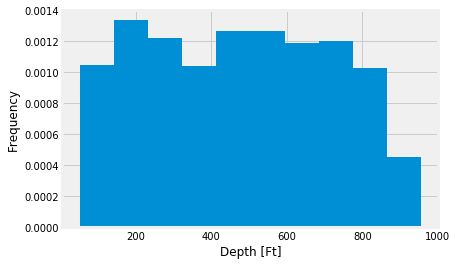

In [33]:
train_nan = train_depth[pd.isnull(train_depth['rle_mask'])]
train_nan['z'].plot(kind='hist',density=True)
plt.xlabel('Depth [Ft]')
plt.show()

In [34]:
train_nan.head()

,rle_mask,z
id,,
575d24d81d,NaN,843
9842f69f8d,NaN,907
28f865caaa,NaN,147
57e394bc67,NaN,765
ef51bbcde7,NaN,712


### Seismic image of no salt in train set

File ID: d67e3a11d8


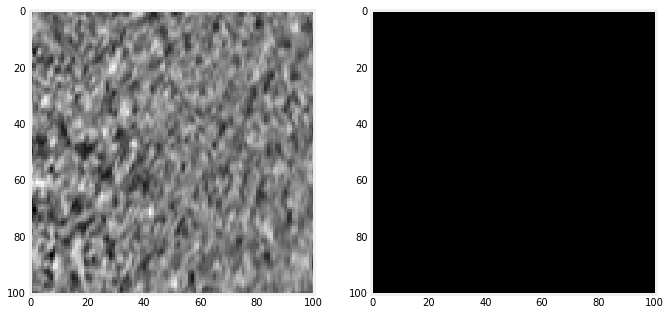

In [35]:
print('File ID: ' + train_nan.index[5])
plt.figure(figsize=(10, 10))

img = mpimg.imread('train/images/'+train_nan.index[5]+'.png')
plt.subplot(121)
plt.grid(False)
plt.imshow(img)

mask = mpimg.imread('train/masks/'+train_nan.index[5]+'.png')
plt.subplot(122)
plt.grid(False)
plt.imshow(mask,cmap='gray')
plt.show()


File ID: 1f0b16aa13


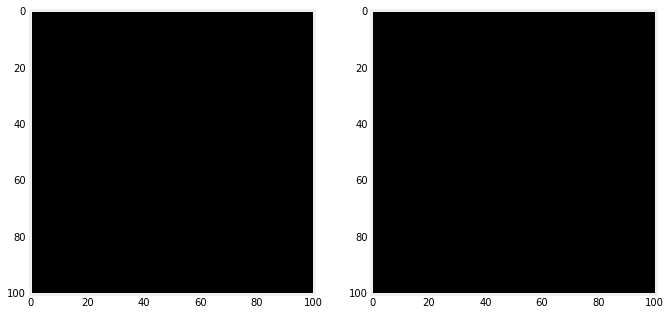

In [36]:
print('File ID: ' + train_nan.index[10])
plt.figure(figsize=(10, 10))

img = mpimg.imread('train/images/'+train_nan.index[10]+'.png')
plt.subplot(121)
plt.grid(False)
plt.imshow(img)

mask = mpimg.imread('train/masks/'+train_nan.index[10]+'.png')
plt.subplot(122)
plt.grid(False)
plt.imshow(mask,cmap='gray')
plt.show()



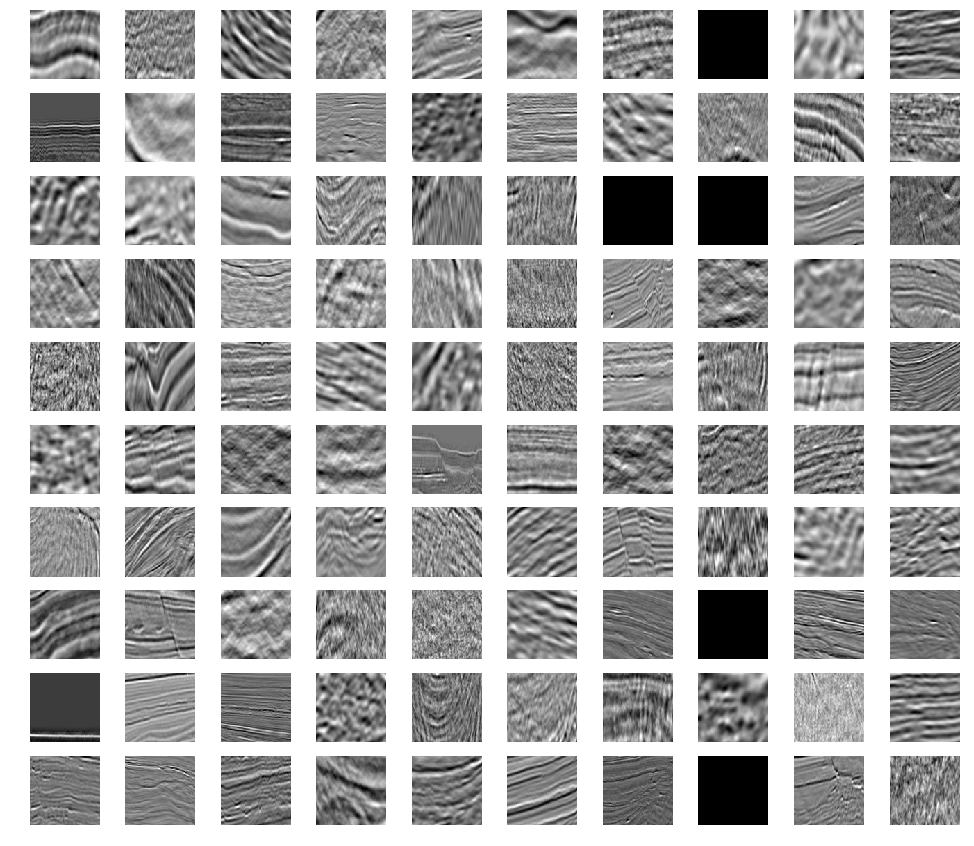

In [37]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 10
n_img = columns*rows

n = len(train_nan)
random.seed(2)
img_id = random.sample(range(0, n-1), n_img)

for i,j in enumerate(img_id):
    img = mpimg.imread('train/images/'+train_nan.index[j]+'.png')
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.show()
    

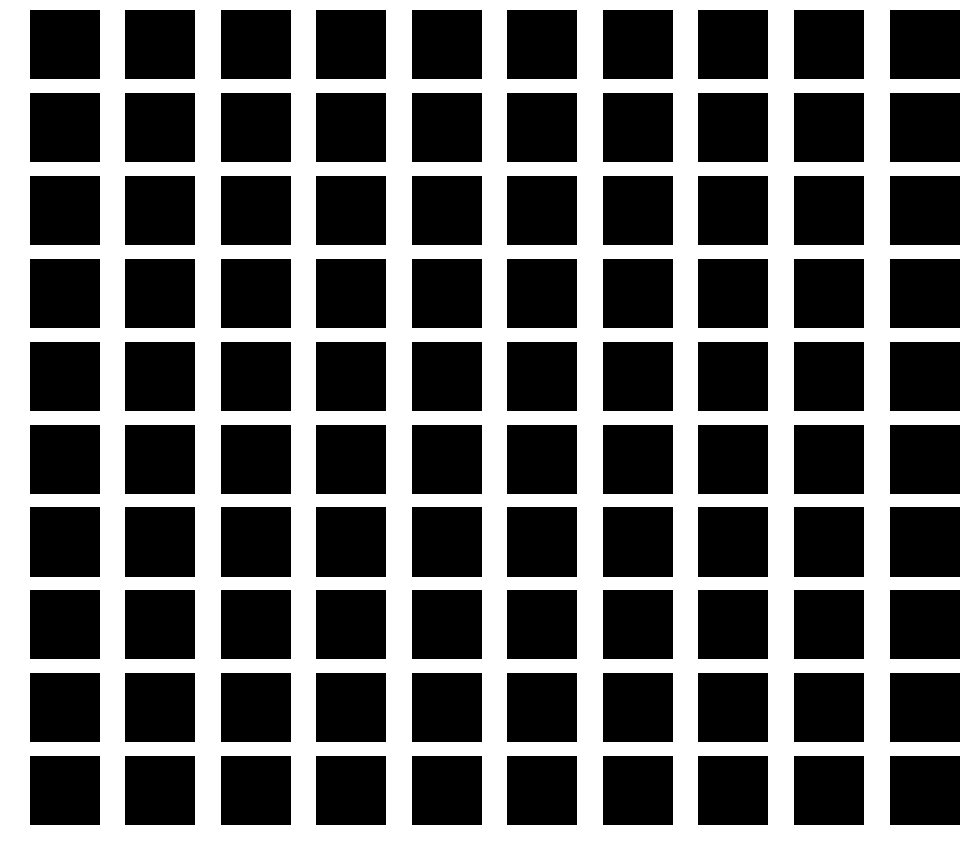

In [38]:
fig=plt.figure(figsize=(15, 15))
for i,j in enumerate(img_id):
    img = mpimg.imread('train/masks/'+train_nan.index[j]+'.png')
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img,cmap='gray')
    
plt.show()  

### Seismic image in train set

In [39]:
plt.style.use('classic')

File ID: a266a2a9df


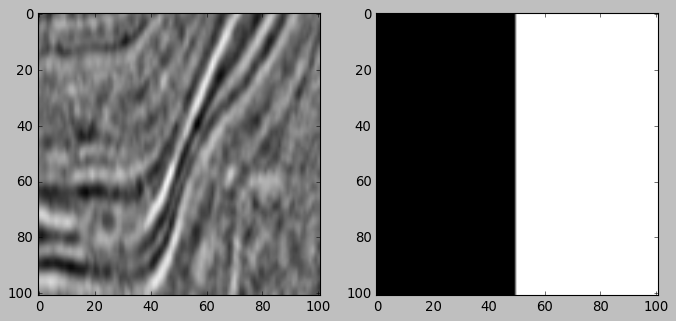

In [40]:
print('File ID: ' + train_depth.index[1])
plt.figure(figsize=(10, 10))

img = mpimg.imread('train/images/'+train_depth.index[1]+'.png')
plt.subplot(121)
plt.grid(False)
plt.imshow(img)

mask = mpimg.imread('train/masks/'+train_depth.index[1]+'.png')
plt.subplot(122)
plt.imshow(mask,cmap='gray')
plt.grid(False)
plt.show()

File ID: 75efad62c1


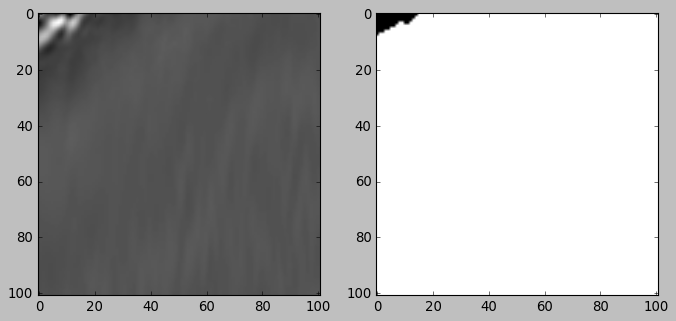

In [41]:
print('File ID: ' + train_depth.index[2])
plt.figure(figsize=(10, 10))

img = mpimg.imread('train/images/'+train_depth.index[2]+'.png')
plt.subplot(121)
plt.grid(False)
plt.imshow(img)

mask = mpimg.imread('train/masks/'+train_depth.index[2]+'.png')
plt.subplot(122)
plt.imshow(mask,cmap='gray')
plt.grid(False)
plt.show()

File ID: 34e51dba6a


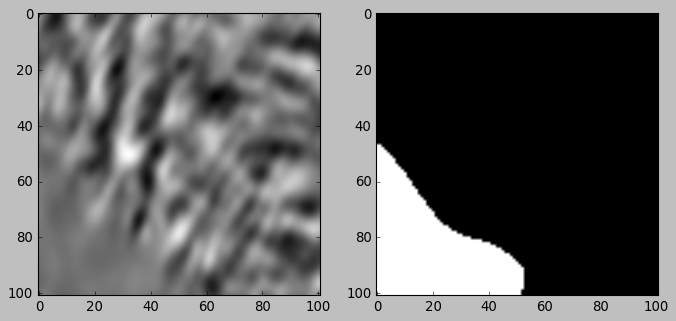

In [42]:
print('File ID: ' + train_depth.index[3])
plt.figure(figsize=(10, 10))

img = mpimg.imread('train/images/'+train_depth.index[3]+'.png')
plt.subplot(121)
plt.grid(False)
plt.imshow(img)

mask = mpimg.imread('train/masks/'+train_depth.index[3]+'.png')
plt.subplot(122)
plt.imshow(mask,cmap='gray')
plt.grid(False)
plt.show()

File ID: 4875705fb0


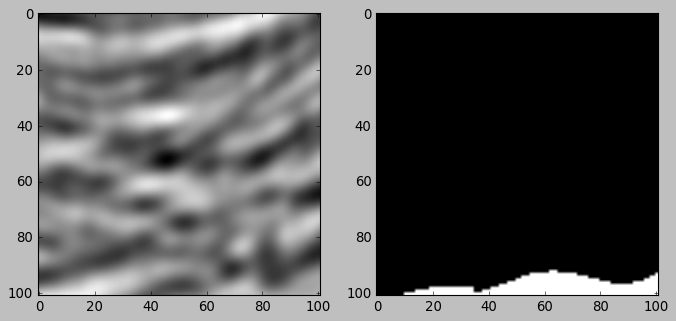

In [43]:
print('File ID: ' + train_depth.index[4])
plt.figure(figsize=(10, 10))

img = mpimg.imread('train/images/'+train_depth.index[4]+'.png')
plt.subplot(121)
plt.grid(False)
plt.imshow(img)

mask = mpimg.imread('train/masks/'+train_depth.index[4]+'.png')
plt.subplot(122)
plt.imshow(mask,cmap='gray')
plt.grid(False)
plt.show()

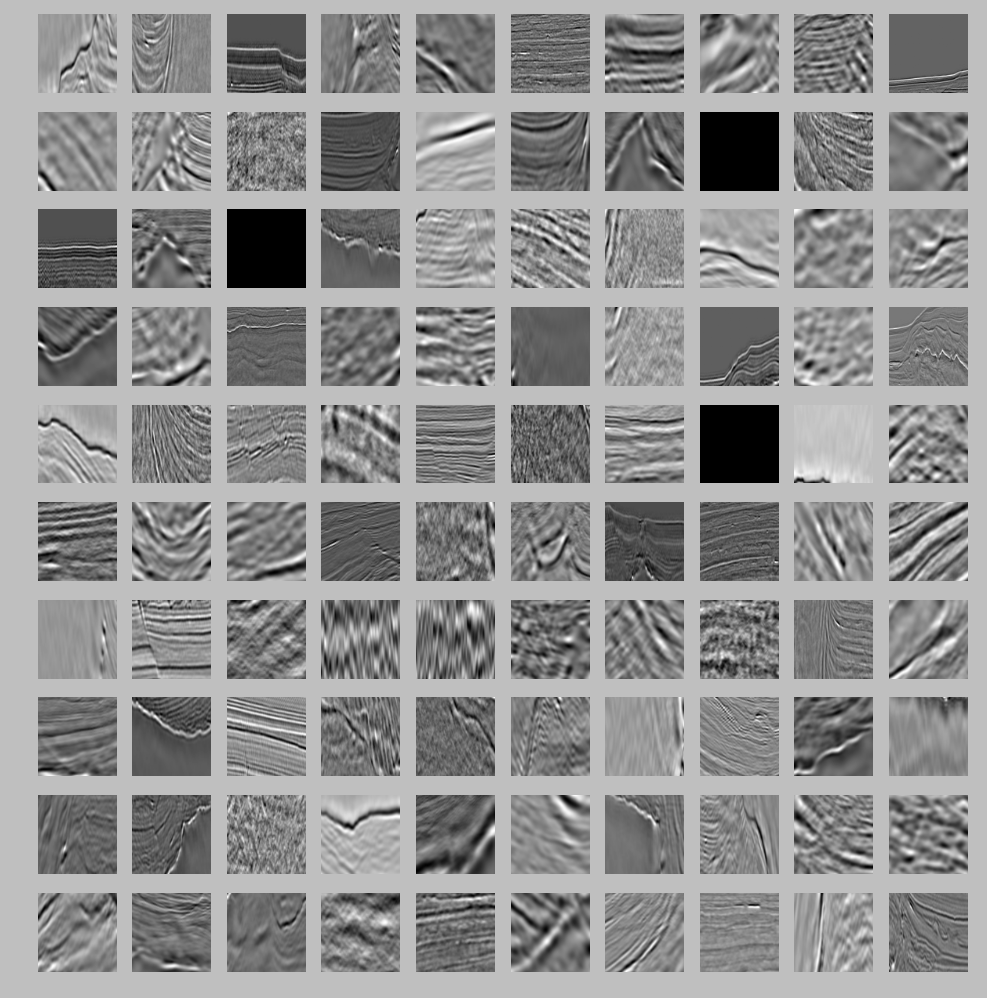

In [44]:
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 10
rows = 10
n_img = columns*rows

n = len(train_nan)
random.seed(7)
img_id = random.sample(range(0, n-1), n_img)

for i,j in enumerate(img_id):
    img = mpimg.imread('train/images/'+train_depth.index[j]+'.png')
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img)

plt.show()

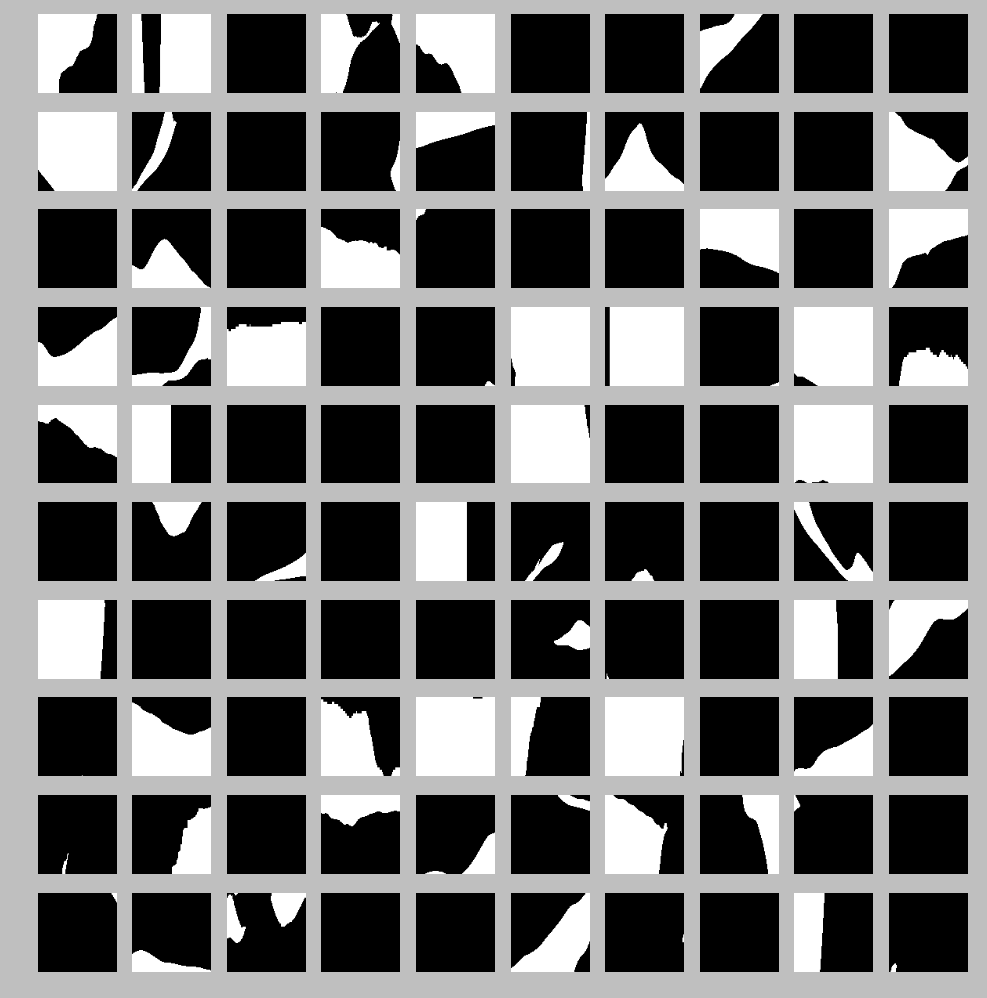

In [45]:
fig=plt.figure(figsize=(15, 15))

for i,j in enumerate(img_id):
    img = mpimg.imread('train/masks/'+train_depth.index[j]+'.png')
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(img,cmap='gray')

plt.show()